In [1]:
import pandas as pd
import sys
import os

In [2]:
sys.path.append(os.path.abspath('C:/Users/teeyob/Predictive_Portfolio_Optimizer/scripts'))

In [3]:
from data_analysis_functions import (
    download_data, clean_data, normalize_data, plot_closing_prices,
    calculate_daily_returns, plot_daily_returns, plot_rolling_statistics,
    detect_outliers, decompose_time_series, calculate_risk_metrics,plot_outliers
)

In [4]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

In [5]:
data = download_data(tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


In [25]:
print(data[['TSLA']])


                                TSLA
Date                                
2015-01-02 00:00:00+00:00  63.358776
2015-01-05 00:00:00+00:00  63.542736
2015-01-06 00:00:00+00:00  63.726711
2015-01-07 00:00:00+00:00  63.765114
2015-01-08 00:00:00+00:00  63.665394
...                              ...
2024-10-24 00:00:00+00:00  73.081184
2024-10-25 00:00:00+00:00  72.931664
2024-10-28 00:00:00+00:00  72.841942
2024-10-29 00:00:00+00:00  72.901749
2024-10-30 00:00:00+00:00  72.831970

[2474 rows x 1 columns]


In [6]:
data['TSLA'].head

<bound method NDFrame.head of Date
2015-01-02 00:00:00+00:00    63.358776
2015-01-05 00:00:00+00:00    63.542736
2015-01-06 00:00:00+00:00    63.726711
2015-01-07 00:00:00+00:00    63.765114
2015-01-08 00:00:00+00:00    63.665394
                               ...    
2024-10-24 00:00:00+00:00    73.081184
2024-10-25 00:00:00+00:00    72.931664
2024-10-28 00:00:00+00:00    72.841942
2024-10-29 00:00:00+00:00    72.901749
2024-10-30 00:00:00+00:00    72.831970
Name: TSLA, Length: 2474, dtype: float64>

Clean Data

In [7]:
data = clean_data(data)

C:\Users\teeyob\Predictive_Portfolio_Optimizer\scripts\data_analysis_functions.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Normalize Data

In [8]:
scaled_data = normalize_data(data)

Plot Closing Prices

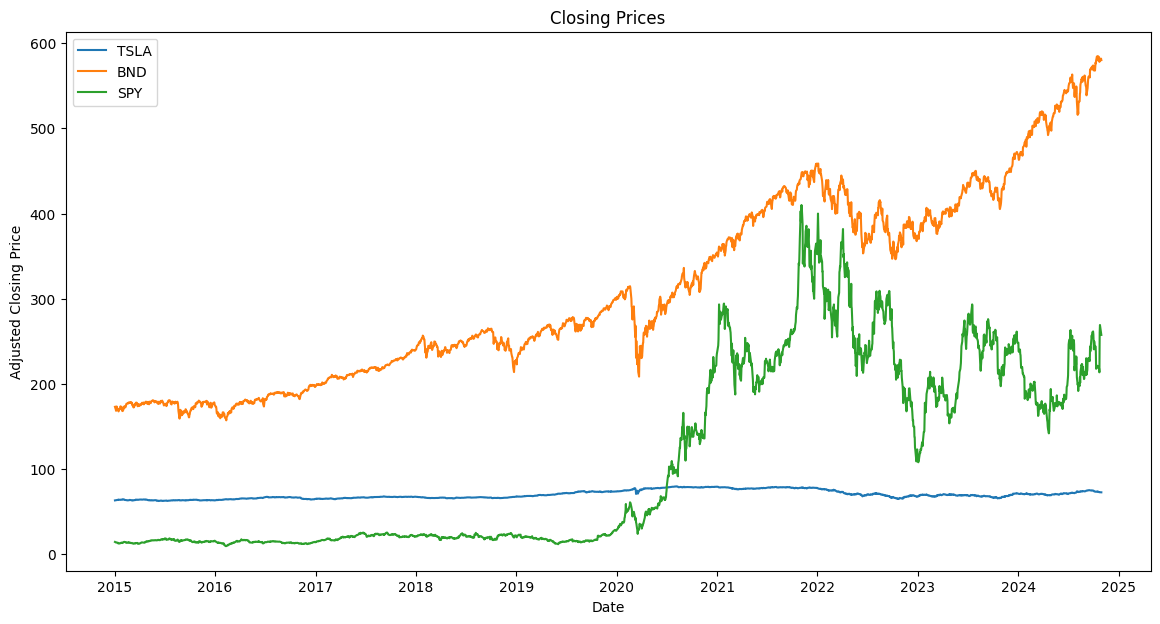

In [9]:
plot_closing_prices(data)

Calculate and Plot Daily Returns

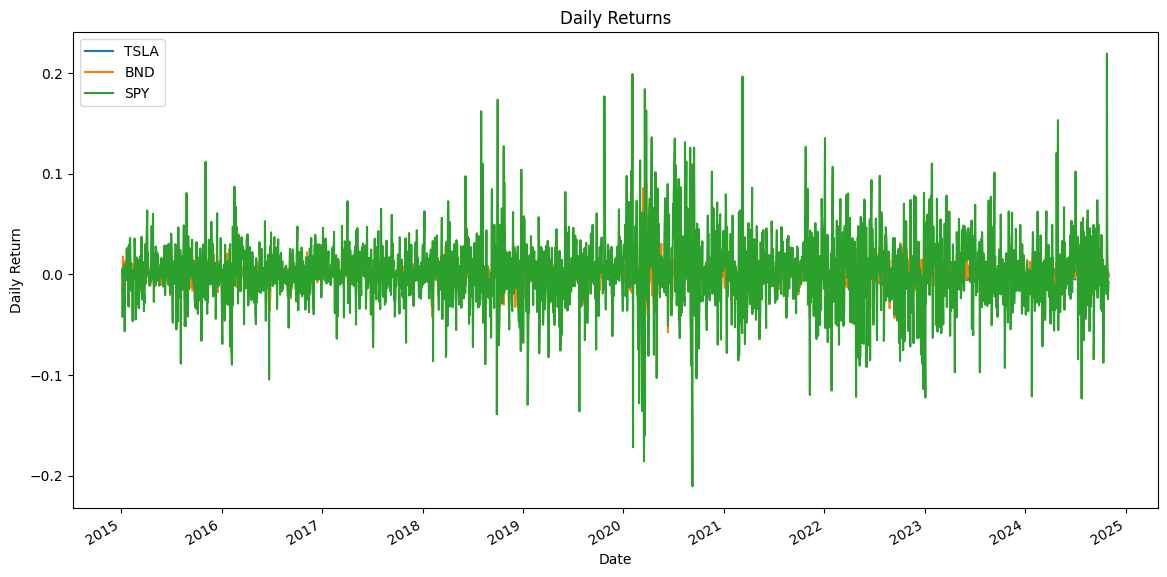

In [10]:
returns = calculate_daily_returns(data)
plot_daily_returns(returns)

Plot Rolling Statistics 

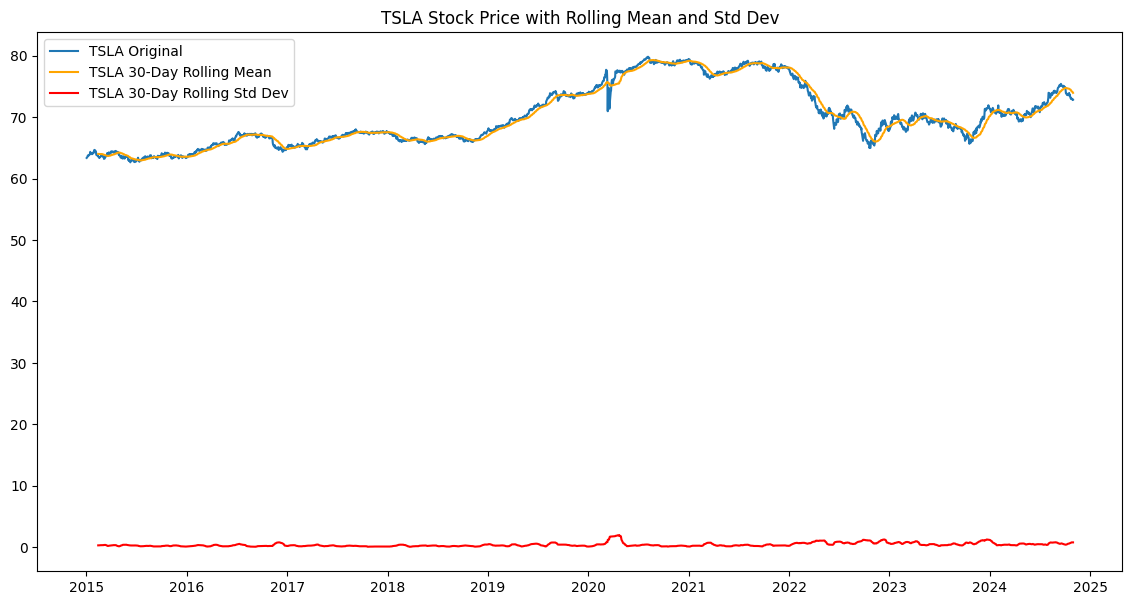

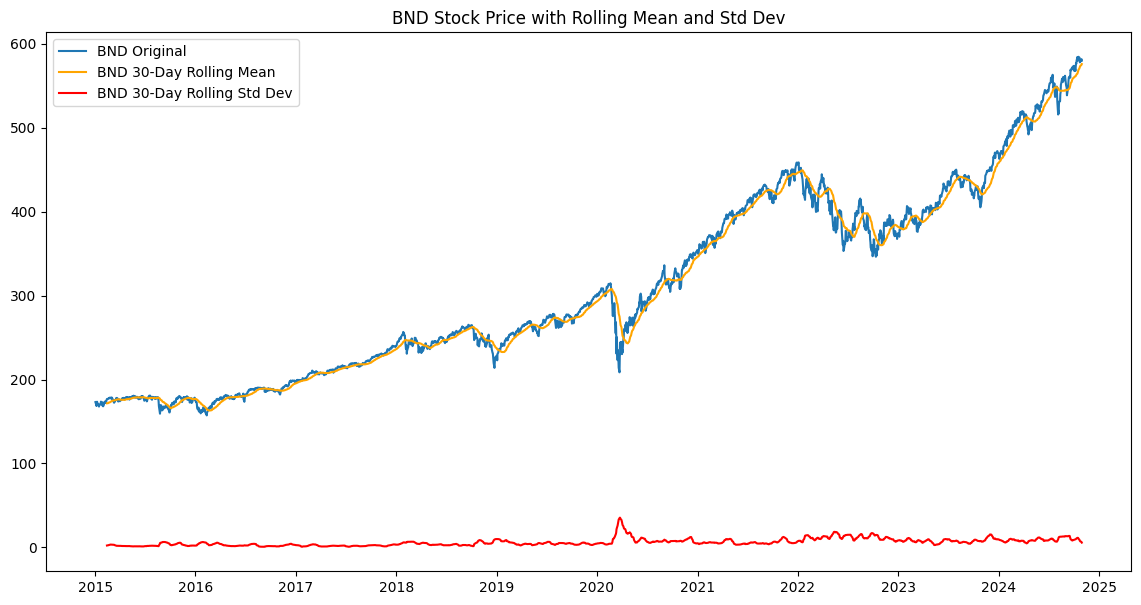

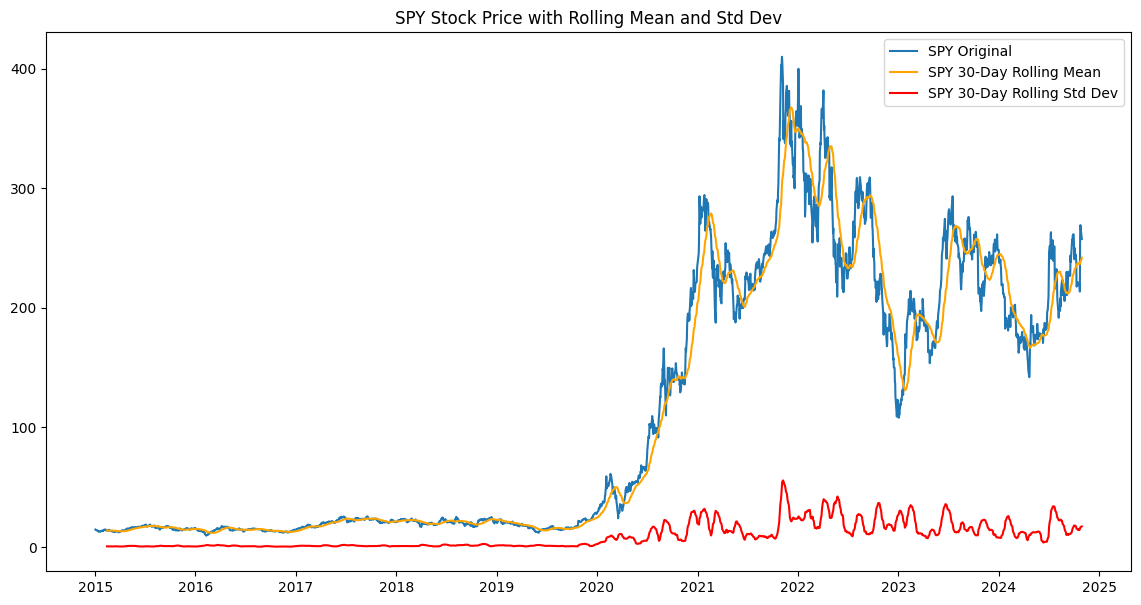

In [17]:
tickers = ['TSLA', 'BND', 'SPY']
for ticker in tickers:
    plot_rolling_statistics(data, ticker)
    



Detect Outliers

In [12]:
outliers = detect_outliers(returns)
print("Outliers in daily returns:")
print(outliers)

Outliers in daily returns:
                               TSLA       BND       SPY
Date                                                   
2015-08-24 00:00:00+00:00       NaN -0.042107       NaN
2015-08-26 00:00:00+00:00       NaN  0.038394       NaN
2015-11-04 00:00:00+00:00       NaN       NaN  0.111735
2016-06-24 00:00:00+00:00       NaN -0.035909       NaN
2018-02-05 00:00:00+00:00       NaN -0.041822       NaN
...                             ...       ...       ...
2024-04-24 00:00:00+00:00       NaN       NaN  0.120611
2024-04-29 00:00:00+00:00       NaN       NaN  0.153069
2024-07-24 00:00:00+00:00       NaN       NaN -0.123346
2024-08-02 00:00:00+00:00  0.011418       NaN       NaN
2024-10-24 00:00:00+00:00       NaN       NaN  0.219190

[89 rows x 3 columns]


Decompose Tesla's Time Series

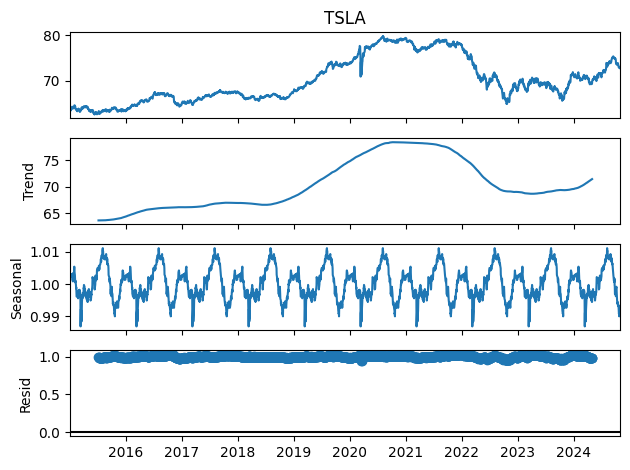

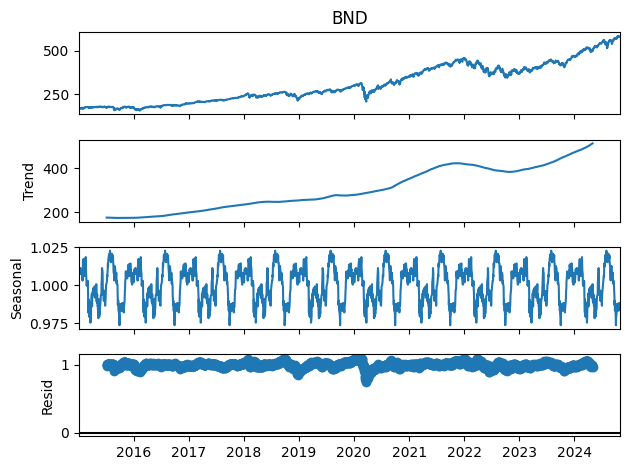

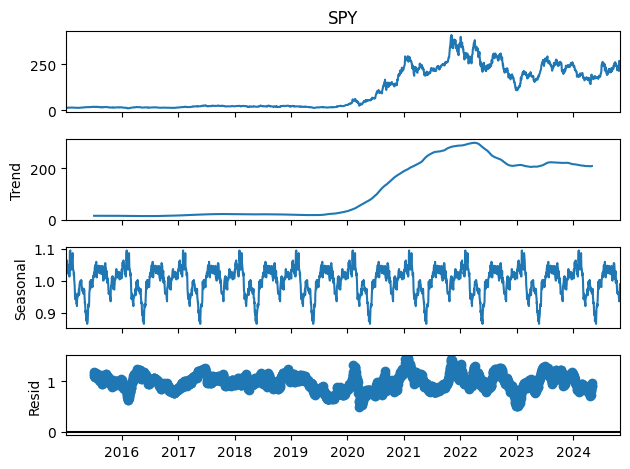

In [18]:
for ticker in tickers:
    decompose_time_series(data, ticker)


Calculate Risk Metrics for Tesla

In [20]:
for ticker in tickers:
    var_95, sharpe_ratio = calculate_risk_metrics(returns, ticker)
    print(f'95% VaR for {ticker}: {var_95:.4f}')
    print(f'Sharpe Ratio for {ticker}: {sharpe_ratio:.4f}')




95% VaR for TSLA: -0.0048
Sharpe Ratio for TSLA: -2.8979
95% VaR for BND: -0.0168
Sharpe Ratio for BND: -0.8487
95% VaR for SPY: -0.0513
Sharpe Ratio for SPY: -0.2291


Display Outliers for Each Ticker Separately and Plot Daily Returns with Outliers Highlighted

Outliers for TSLA:


,TSLA
Date,
2020-03-10 00:00:00+00:00,-0.013444
2020-03-11 00:00:00+00:00,-0.018940
2020-03-12 00:00:00+00:00,-0.054385
2020-03-13 00:00:00+00:00,0.042201
2020-03-16 00:00:00+00:00,0.010511
2020-03-17 00:00:00+00:00,-0.020686
2020-03-18 00:00:00+00:00,-0.024140
2020-03-20 00:00:00+00:00,0.016956
2020-03-23 00:00:00+00:00,0.022149


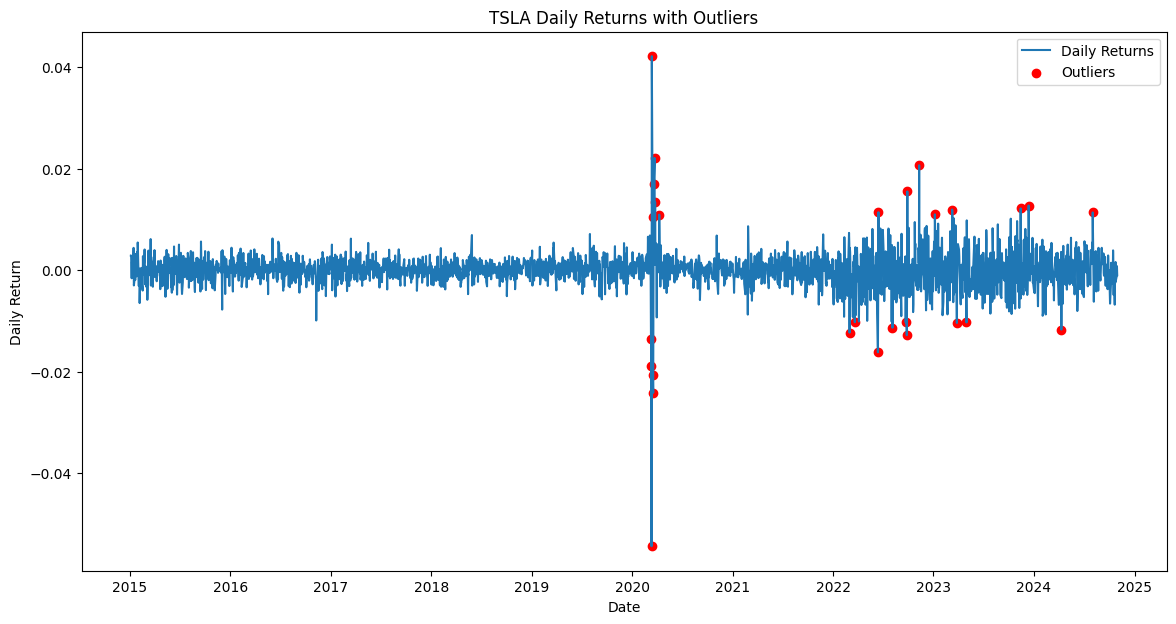

Outliers for BND:


,BND
Date,
2015-08-24 00:00:00+00:00,-0.042107
2015-08-26 00:00:00+00:00,0.038394
2016-06-24 00:00:00+00:00,-0.035909
2018-02-05 00:00:00+00:00,-0.041822
2018-02-08 00:00:00+00:00,-0.037509
2018-12-26 00:00:00+00:00,0.050525
2020-02-24 00:00:00+00:00,-0.033165
2020-02-27 00:00:00+00:00,-0.044912
2020-03-02 00:00:00+00:00,0.043307


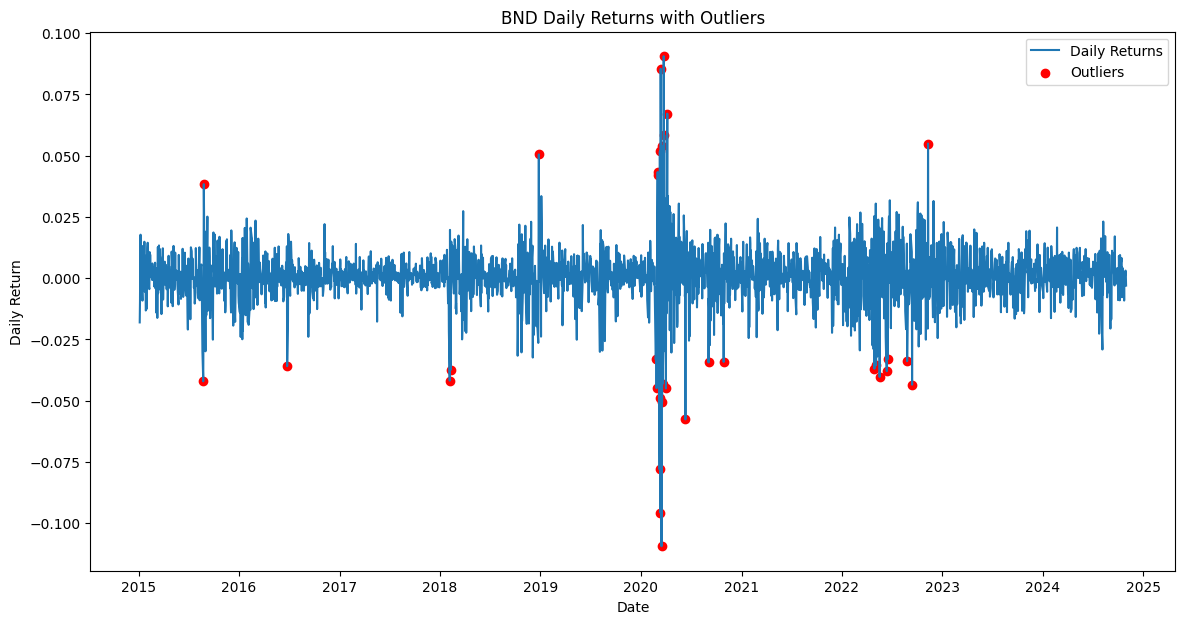

Outliers for SPY:


,SPY
Date,
2015-11-04 00:00:00+00:00,0.111735
2018-08-02 00:00:00+00:00,0.161880
2018-08-07 00:00:00+00:00,0.109886
2018-09-28 00:00:00+00:00,-0.139015
2018-10-01 00:00:00+00:00,0.173471
2018-10-23 00:00:00+00:00,0.127189
2019-01-18 00:00:00+00:00,-0.129711
2019-07-25 00:00:00+00:00,-0.136137
2019-10-24 00:00:00+00:00,0.176692


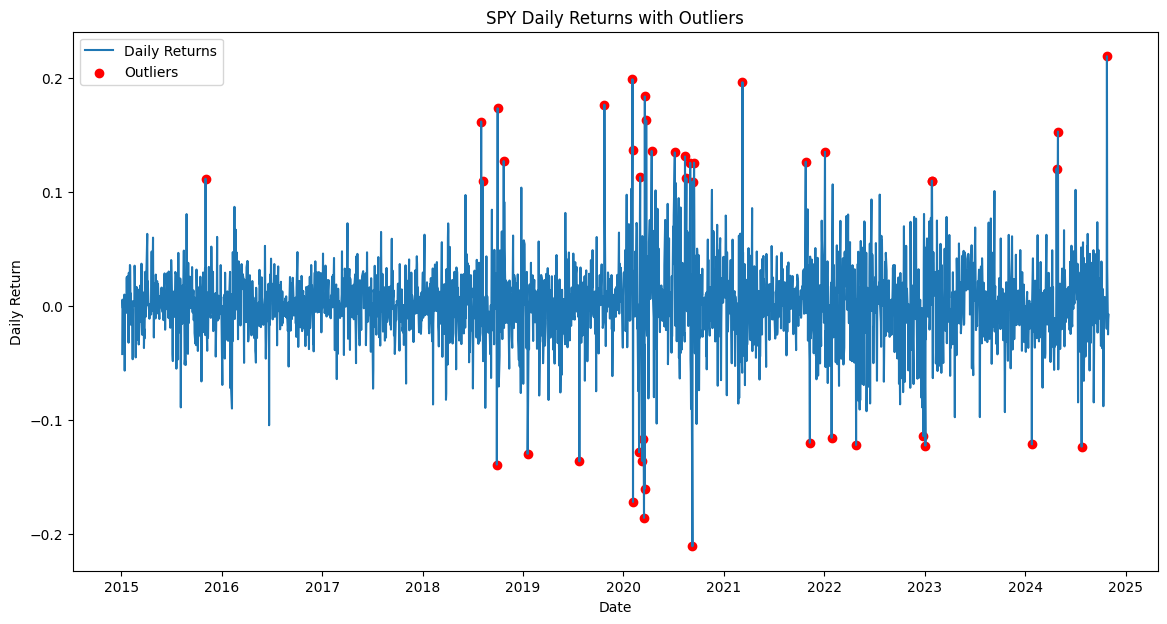

In [16]:

for ticker in tickers:
    print(f"Outliers for {ticker}:")
    ticker_outliers = outliers[[ticker]].dropna()
    display(ticker_outliers)  

    plot_outliers(returns, ticker_outliers, ticker)


In [23]:
print(data['TSLA'])



Date
2015-01-02 00:00:00+00:00    63.358776
2015-01-05 00:00:00+00:00    63.542736
2015-01-06 00:00:00+00:00    63.726711
2015-01-07 00:00:00+00:00    63.765114
2015-01-08 00:00:00+00:00    63.665394
                               ...    
2024-10-24 00:00:00+00:00    73.081184
2024-10-25 00:00:00+00:00    72.931664
2024-10-28 00:00:00+00:00    72.841942
2024-10-29 00:00:00+00:00    72.901749
2024-10-30 00:00:00+00:00    72.831970
Name: TSLA, Length: 2474, dtype: float64


In [24]:
print(data[['TSLA']])


                                TSLA
Date                                
2015-01-02 00:00:00+00:00  63.358776
2015-01-05 00:00:00+00:00  63.542736
2015-01-06 00:00:00+00:00  63.726711
2015-01-07 00:00:00+00:00  63.765114
2015-01-08 00:00:00+00:00  63.665394
...                              ...
2024-10-24 00:00:00+00:00  73.081184
2024-10-25 00:00:00+00:00  72.931664
2024-10-28 00:00:00+00:00  72.841942
2024-10-29 00:00:00+00:00  72.901749
2024-10-30 00:00:00+00:00  72.831970

[2474 rows x 1 columns]
